**LOGICA DE FUZZY COM PYTHON: ESTUDO DE CASO GORJETA **

Antecedentes ( ENTRADAS )

Servio: que nota você daria para o serviço, em uma escala de 0 a 10

  * Ruim, Aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10

  * Ruim, boa, Saborosa

Consequentes ( SAÍDAS )

Gorjetas: quanta gorjeta você daria, entre 0% e 20%

  * Baixa, média, alta

REGRAS!!

    * Se a qualidade da comida for ruim ou o serviço for ruim então, a gorjeta será baixa.
    * Se o serviço for médio então, a gorjeta será média
    * Se o serviço for bom e a qualidade da comida for saborosa, então a gorjeta sera alta


**Instalação e importação das bibliotecas**

    * Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html


In [1]:
#INSTALAÇÃO DA BIBLIOTECA PIP PARA USO!!
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=9a0fc5d421731e3eba3901d6e4218e16bb35828ebc7ca37e8bdbc6622aea1451
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np #biblioteca cientifica do Python!!
import skfuzzy as fuzzy # Biblioteca de Fuzzy!!!
from skfuzzy import control as ctrl #importação da biblioteca de controle

***ANTECEDENTES E CONSEQUENTE***

In [3]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
#Criando as duas variaveis correlacionadas ao antecedentes = Qualidade e Serviço!!
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [5]:
qualidade #visualizando o tipo de variavel

Antecedent: qualidade

In [6]:
qualidade.universe #Verificar os possiveis valores para essa variavel ! / Valores que podem ser informados!!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [9]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

**MENBERSHIP FUNCTIONS *** FUNÇÃO DE PERTINENCIA PARA GERAR GRAFICOS!!!


In [10]:
qualidade.automf(number = 3, names = [ 'ruim', 'boa', 'saborosa'])
servico.automf(number = 3, names = ['ruim', 'aceitável', 'ótimo'])

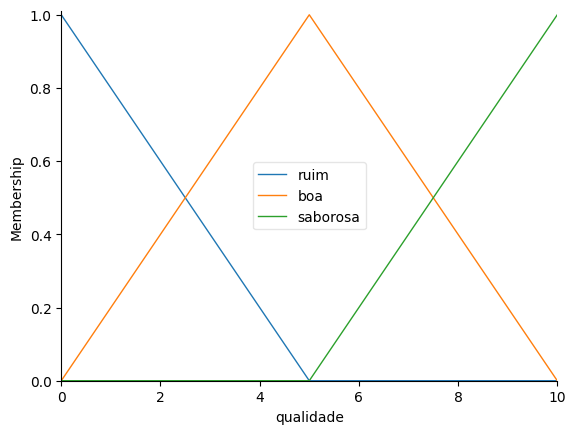

In [12]:
qualidade.view()